# Import Library dan Upload Dataset

Proses awal dilakukan dengan melakukan import dari berbagai libraries yang diperlukan, melakukan instalasi, dan membaca file dataset dari keterlambatan penerbangan yang tersedia dalam format CSV.

In [23]:
# Import libraries yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [24]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Code ini untuk menghilangkan warning message saat kita menjalankan code-code
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Membaca dataset CSV Airline Delay Cause
airline_data = pd.read_csv('Airline_Delay_Cause.csv')

 # Transforming for Analysis Process

Proses Transforming for Analysis dilakukan dengan tujuan untuk mempersiapkan dan menyempurnakan data yang didapat untuk analisis dan visualisasi. Pada data yang digunakan ini, terdapat sejumlah proses penyempurnaan yang dilakukan antara lain sebagai berikut.

````

## Transform Process 1: <i>Parsing Airport Variables</i>
Proses ini dilakukan dengan parsing variabel yang terdapat pada atribut kolom "airport_name" dengan mengekstraksi nama kota dan nama state menjadi dua kolom baru yang terpisah dari nama bandara karena data pada kolom tersebut memiliki tiga variabel yang berbeda dengan format yang parseable yaitu {kota tempat lokasi bandara}, {state tempat lokasi bandara}: {nama bandara}. Setelah dilakukan proses parsing, kolom "airport_name" yang awalnya hanya satu saja akan dibagi menjadi tiga kolom yaitu "airport_city", "airport_state", dan "airport_name".

In [27]:
airline_data[['airport_city', 'airport_state', 'airport_name']] = airline_data['airport_name'].str.extract(r'(.+),\s([A-Z]{2}):\s(.+)')

# Tampilkan hasil
airline_data[['airport_city', 'airport_state', 'airport_name']].head()

,airport_city,airport_state,airport_name
0,Allentown/Bethlehem/Easton,PA,Lehigh Valley International
1,Albany,GA,Southwest Georgia Regional
2,Alexandria,LA,Alexandria International
3,Augusta,GA,Augusta Regional at Bush Field
4,Albany,NY,Albany International


In [28]:
airline_data[['airport_city']].value_counts()

airport_city         
Washington               2745
New York                 2326
Portland                 2303
Chicago                  1919
Houston                  1912
                         ... 
Fort Collins/Loveland       1
Macon                       1
Wendover                    1
Tokeen                      1
Youngstown/Warren           1
Name: count, Length: 376, dtype: int64

In [29]:
state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii',
    'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska',
    'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
    'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'PR': 'Puerto Rico', 'VI': 'Virgin Islands', 'TT': 'Trust Territories'  # TT bisa diganti sesuai konteks
}

# Misal kolom kode negara bagian adalah 'airport_state'
airline_data['airport_state_full'] = airline_data['airport_state'].map(state_abbrev_to_name)

## Transform Process 2: <i>Percentage Columns</i>
Proses ini dilakukan dengan mengubah beberapa kolom data menjadi proporsi persentase. Kalkulasi dilakukan karena jika dilakukan agregasi terhadap nilai keseluruhan dari kolom-kolom tersebut, maka hasilnya akan sama dengan sebuah kolom data yang menampung nilai-nilai data tersebut. Dengan kata lain, ada beberapa atribut data yang menjadi sub kategori dari atribut data tertentu (kategori induk). Nilai kolom sebaiknya diwakilkan menjadi persentase (desimal) untuk kemudahan analisis dan visualisasi proporsi data yang nantinya akan membandingkan kuantitas setiap sub kategori tersebut (misal perbandingan penyebab penundaan penerbangan). Proses ini menjadi penting karena untuk nilai data yang termasuk ke dalam "kategori induk" memiliki nilai yang berbeda-beda untuk setiap baris data.

In [30]:
# Menambahkan kolom persentase untuk jumlah penerbangan yang tertunda selama 15 menit atau lebih, dialihkan, dan dibatalkan
airline_data["arr_del15_percentage"] = (airline_data["arr_del15"] / airline_data["arr_flights"]) * 100
airline_data["arr_diverted_percentage"] = (airline_data["arr_diverted"] / airline_data["arr_flights"]) * 100
airline_data["arr_cancelled_percentage"] = (airline_data["arr_cancelled"] / airline_data["arr_flights"]) * 100

In [31]:
# Menambahkan kolom persentase untuk penyebab keterlambatan selama 15 menit atau lebih
airline_data["carrier_ct_percentage"] = (airline_data["carrier_ct"] / airline_data["arr_del15"]) * 100
airline_data["weather_ct_percentage"] = (airline_data["weather_ct"] / airline_data["arr_del15"]) * 100
airline_data["nas_ct_percentage"] = (airline_data["nas_ct"] / airline_data["arr_del15"]) * 100
airline_data["security_ct_percentage"] = (airline_data["security_ct"] / airline_data["arr_del15"]) * 100
airline_data["late_aircraft_ct_percentage"] = (airline_data["late_aircraft_ct"] / airline_data["arr_del15"]) * 100

In [32]:
# Menambahkan kolom persentase untuk menit keterlambatan yang disebabkan oleh masing-masing penyebab
airline_data["carrier_delay_percentage"] = (airline_data["carrier_delay"] / airline_data["arr_delay"]) * 100
airline_data["weather_delay_percentage"] = (airline_data["weather_delay"] / airline_data["arr_delay"]) * 100
airline_data["nas_delay_percentage"] = (airline_data["nas_delay"] / airline_data["arr_delay"]) * 100
airline_data["security_delay_percentage"] = (airline_data["security_delay"] / airline_data["arr_delay"]) * 100
airline_data["late_aircraft_delay_percentage"] = (airline_data["late_aircraft_delay"] / airline_data["arr_delay"]) * 100

## Reorder Columns
Melakukan pengurutan terhadap kolom DataFrame setelah ditambahkan beberapa kolom baru pada proses Transforming

In [33]:
# Pengurutan kolom DataFrame
ordered_columns = [
    'year', 'month', 'carrier', 'carrier_name', 'airport',
    'airport_city', 'airport_state', 'airport_state_full', 'airport_name', 
    'arr_flights',
    'arr_del15', 'arr_del15_percentage',
    'arr_cancelled', 'arr_cancelled_percentage',
    'arr_diverted', 'arr_diverted_percentage',
    'carrier_ct', 'carrier_ct_percentage',
    'weather_ct', 'weather_ct_percentage',
    'nas_ct', 'nas_ct_percentage',
    'security_ct', 'security_ct_percentage',
    'late_aircraft_ct', 'late_aircraft_ct_percentage',
    'arr_delay',
    'carrier_delay', 'carrier_delay_percentage',
    'weather_delay', 'weather_delay_percentage',
    'nas_delay', 'nas_delay_percentage',
    'security_delay', 'security_delay_percentage',
    'late_aircraft_delay', 'late_aircraft_delay_percentage'
]

# Reorder the DataFrame columns
airline_data = airline_data[ordered_columns]



In [34]:
# Menampilkan 5 baris pertama dari DataFrame yang telah diubah
airline_data.head()

,year,month,carrier,carrier_name,airport,airport_city,airport_state,airport_state_full,airport_name,arr_flights,...,carrier_delay,carrier_delay_percentage,weather_delay,weather_delay_percentage,nas_delay,nas_delay_percentage,security_delay,security_delay_percentage,late_aircraft_delay,late_aircraft_delay_percentage
0,2023,8,9E,Endeavor Air Inc.,ABE,Allentown/Bethlehem/Easton,PA,Pennsylvania,Lehigh Valley International,89.0,...,71.0,5.163636,761.0,55.345455,118.0,8.581818,0.0,0.0,425.0,30.909091
1,2023,8,9E,Endeavor Air Inc.,ABY,Albany,GA,Georgia,Southwest Georgia Regional,62.0,...,218.0,27.284105,1.0,0.125156,62.0,7.759700,0.0,0.0,518.0,64.831039
2,2023,8,9E,Endeavor Air Inc.,AEX,Alexandria,LA,Louisiana,Alexandria International,62.0,...,56.0,7.310705,188.0,24.543081,78.0,10.182768,0.0,0.0,444.0,57.963446
3,2023,8,9E,Endeavor Air Inc.,AGS,Augusta,GA,Georgia,Augusta Regional at Bush Field,66.0,...,471.0,33.715104,320.0,22.906228,388.0,27.773801,0.0,0.0,218.0,15.604868
4,2023,8,9E,Endeavor Air Inc.,ALB,Albany,NY,New York,Albany International,92.0,...,628.0,41.045752,0.0,0.000000,134.0,8.758170,0.0,0.0,768.0,50.196078


## Save new CSV file
Melakukan penyimpanan terhadap file CSV baru yang sudah dilakukan transformasi.

In [35]:
airline_data.to_csv('Airline_Delay_Cause_Data_Processing.csv', index=False)
print("New CSV file 'Airline_Delay_Cause_Data_Processing.csv' saved successfully!")

New CSV file 'Airline_Delay_Cause_Data_Processing.csv' saved successfully!


``````

----------

```````

 # Exploratory Data Analysis
 Melakukan eksplorasi terhadap data yang ada untuk ditampilkan visualisasinya.

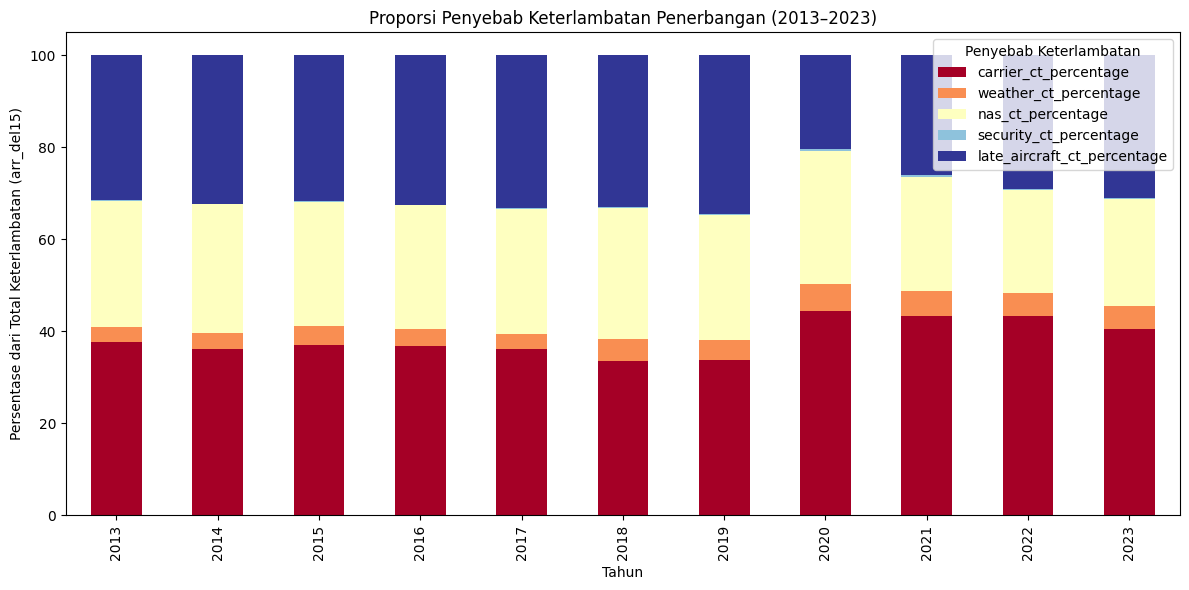

In [36]:
grouped = airline_data.groupby("year")[["carrier_ct_percentage", "weather_ct_percentage", 
                              "nas_ct_percentage", "security_ct_percentage", 
                              "late_aircraft_ct_percentage"]].mean()

grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='RdYlBu')
plt.title("Proporsi Penyebab Keterlambatan Penerbangan (2013–2023)")
plt.ylabel("Persentase dari Total Keterlambatan (arr_del15)")
plt.xlabel("Tahun")
plt.legend(title="Penyebab Keterlambatan")
plt.tight_layout()
plt.show()

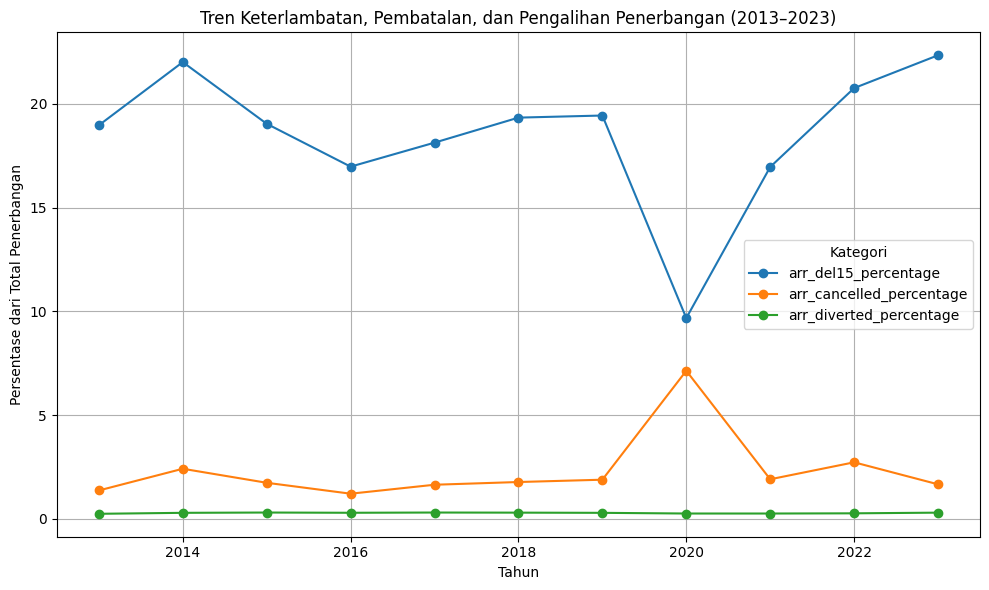

In [37]:
summary = airline_data.groupby("year")[["arr_del15_percentage", "arr_cancelled_percentage", "arr_diverted_percentage"]].mean()

summary.plot(figsize=(10, 6), marker='o')
plt.title("Tren Keterlambatan, Pembatalan, dan Pengalihan Penerbangan (2013–2023)")
plt.ylabel("Persentase dari Total Penerbangan")
plt.xlabel("Tahun")
plt.legend(title="Kategori")
plt.grid(True)
plt.tight_layout()
plt.show()

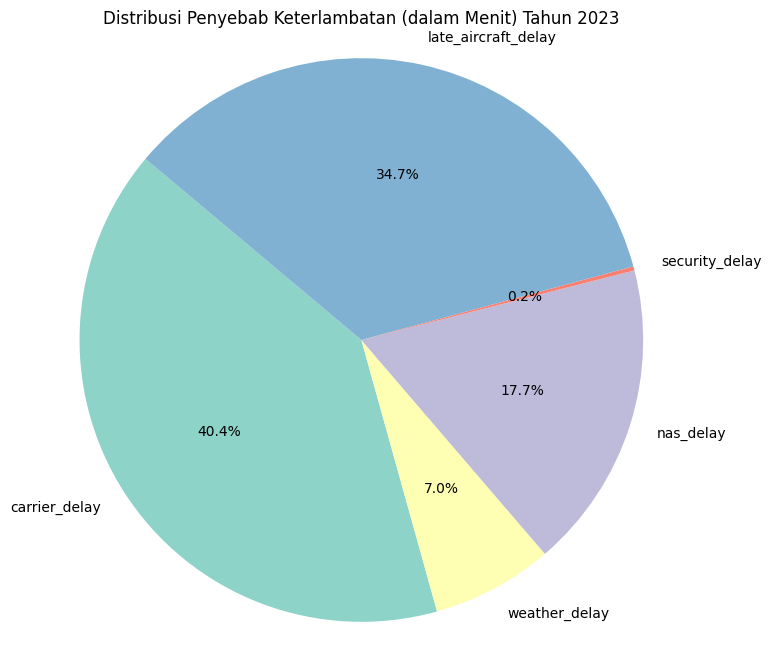

In [38]:
year_selected = 2023
df_year = airline_data[airline_data['year'] == year_selected]

mean_delay_distribution = df_year[["carrier_delay_percentage", "weather_delay_percentage",
                                   "nas_delay_percentage", "security_delay_percentage",
                                   "late_aircraft_delay_percentage"]].mean()

plt.figure(figsize=(8, 8))
plt.pie(mean_delay_distribution, labels=mean_delay_distribution.index.str.replace("_percentage", ""),
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title(f"Distribusi Penyebab Keterlambatan (dalam Menit) Tahun {year_selected}")
plt.axis('equal')
plt.show()

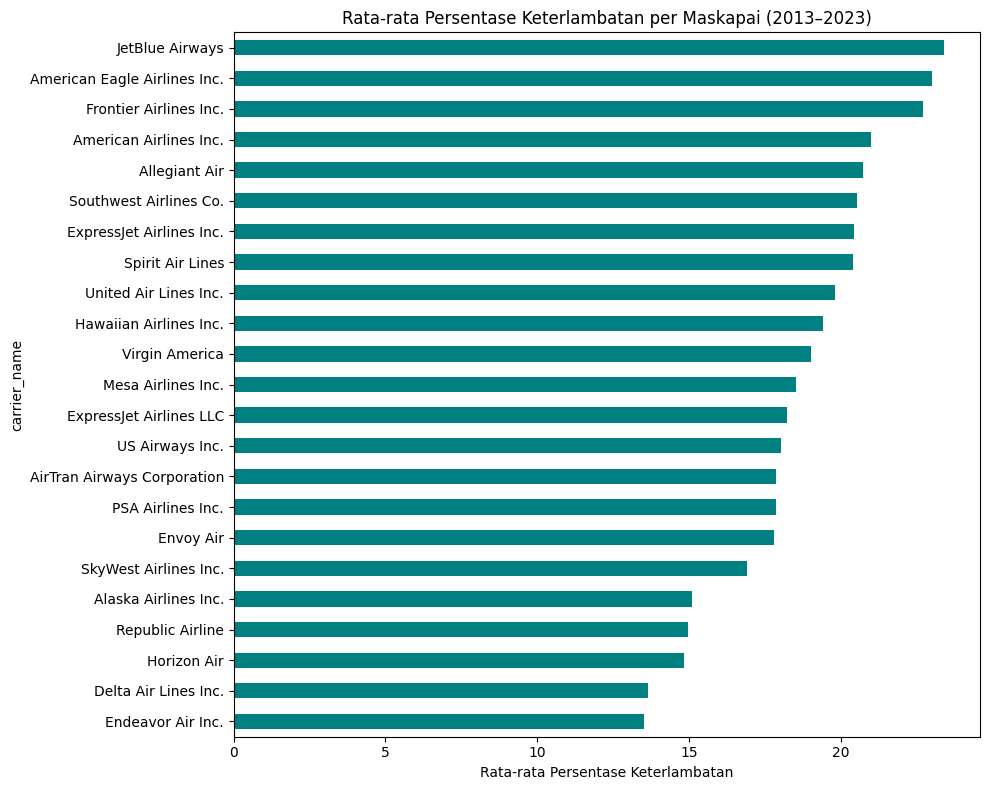

In [39]:
carrier_avg_delay = airline_data.groupby('carrier_name')['arr_del15_percentage'].mean().sort_values()

carrier_avg_delay.plot(kind='barh', figsize=(10, 8), color='teal')
plt.title('Rata-rata Persentase Keterlambatan per Maskapai (2013–2023)')
plt.xlabel('Rata-rata Persentase Keterlambatan')
plt.tight_layout()
plt.show()

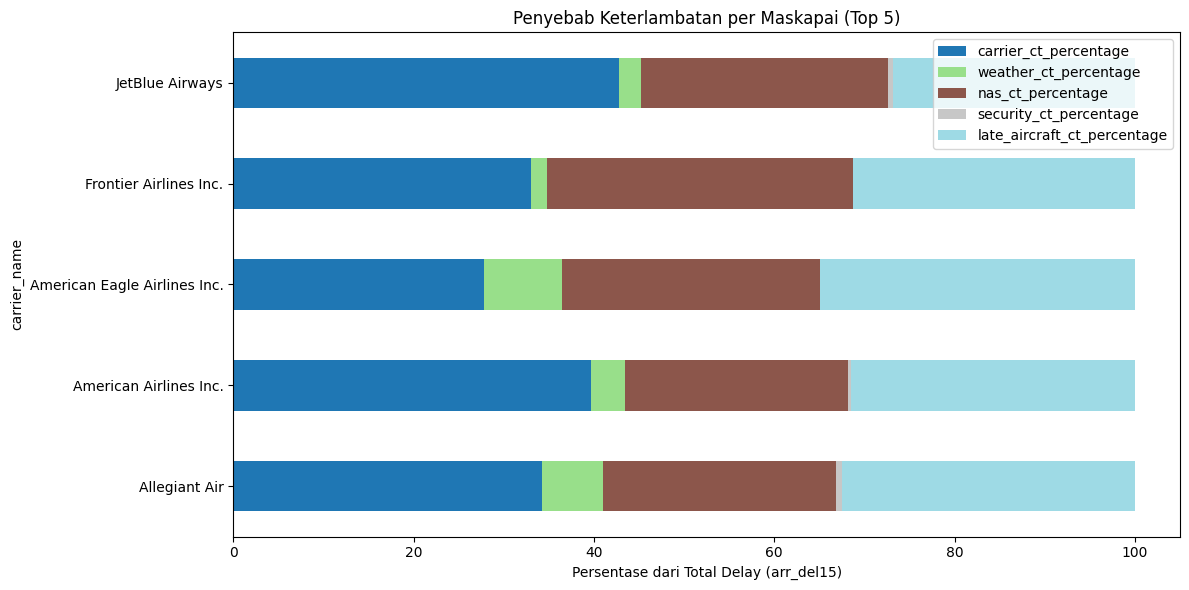

In [40]:
top_carriers = airline_data.groupby('carrier_name')['arr_del15_percentage'].mean().sort_values(ascending=False).head(5).index
df_top_carriers = airline_data[airline_data['carrier_name'].isin(top_carriers)]

carrier_stacked = df_top_carriers.groupby('carrier_name')[
    ['carrier_ct_percentage', 'weather_ct_percentage', 'nas_ct_percentage', 
     'security_ct_percentage', 'late_aircraft_ct_percentage']].mean()

carrier_stacked.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Penyebab Keterlambatan per Maskapai (Top 5)')
plt.xlabel('Persentase dari Total Delay (arr_del15)')
plt.tight_layout()
plt.show()

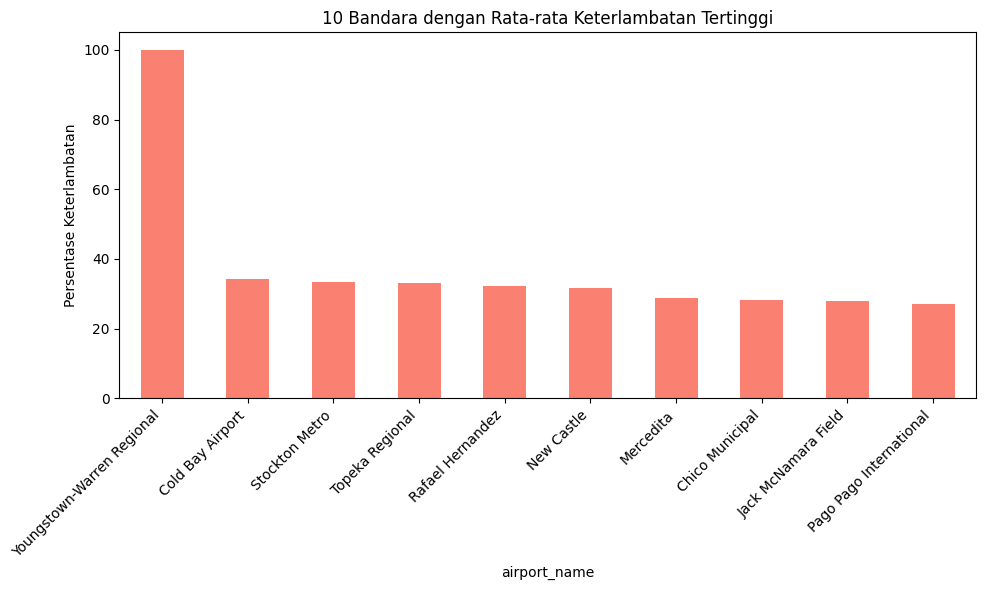

In [41]:
top_airports = airline_data.groupby('airport_name')['arr_del15_percentage'].mean().sort_values(ascending=False).head(10)

top_airports.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('10 Bandara dengan Rata-rata Keterlambatan Tertinggi')
plt.ylabel('Persentase Keterlambatan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

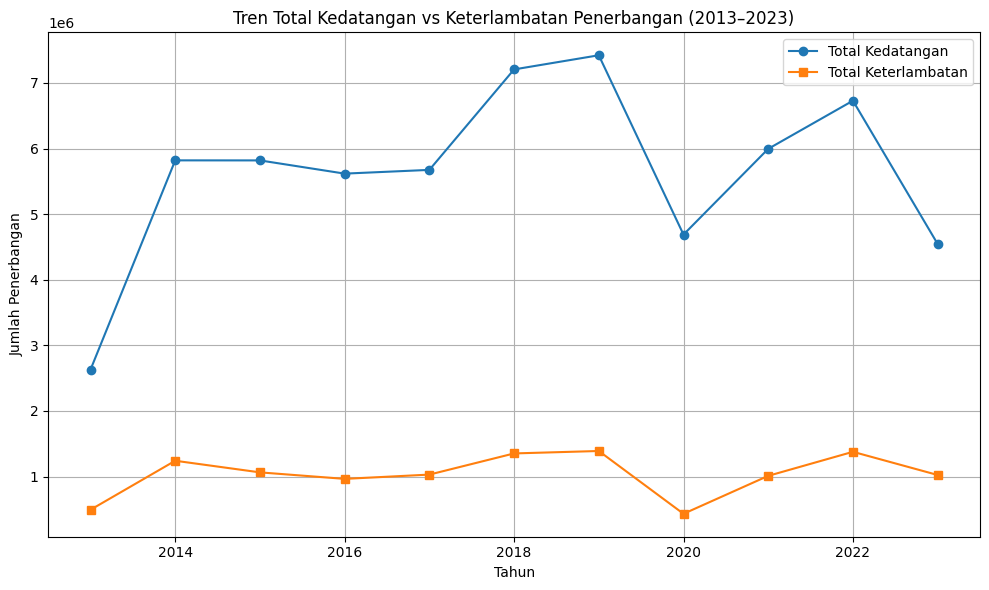

In [42]:
trend = airline_data.groupby('year')[['arr_flights', 'arr_del15']].sum()

plt.figure(figsize=(10, 6))
plt.plot(trend.index, trend['arr_flights'], label='Total Kedatangan', marker='o')
plt.plot(trend.index, trend['arr_del15'], label='Total Keterlambatan', marker='s')
plt.title('Tren Total Kedatangan vs Keterlambatan Penerbangan (2013–2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penerbangan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# Hitung rata-rata keterlambatan per state
state_delay = airline_data.groupby('airport_state')['arr_del15_percentage'].mean().reset_index()

state_delay['airport_state_full'] = state_delay['airport_state'].map(state_abbrev_to_name)

state_delay.head(5)

,airport_state,arr_del15_percentage,airport_state_full
0,AK,15.624957,Alaska
1,AL,18.690375,Alabama
2,AR,18.203598,Arkansas
3,AZ,17.713353,Arizona
4,CA,18.483551,California


In [44]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_delay['airport_state'],  # State abbreviations, e.g. 'NY', 'CA'
    z=state_delay['arr_del15_percentage'],  # Values to be color-coded
    locationmode='USA-states',  # Match state abbreviations
    colorscale='Blues',
    colorbar_title="Persentase Keterlambatan",
    text=state_delay['airport_state_full'],  # Hover text
))

fig.update_layout(
    title_text='Rata-rata Persentase Keterlambatan >15 Menit per Negara Bagian (2013-2023)',
    geo_scope='usa',  # Limit map scope to USA
)

fig.show()

# fig = go.choropleth(state_delay,
#                     locations='airport_state',
#                     color='arr_del15_percentage',
#                     color_continuous_scale='Reds',
#                     scope='usa',
#                     labels={'arr_del15_percentage':'% Delay >15m'},
#                     title='Rata-rata Persentase Keterlambatan >15 Menit per Negara Bagian')